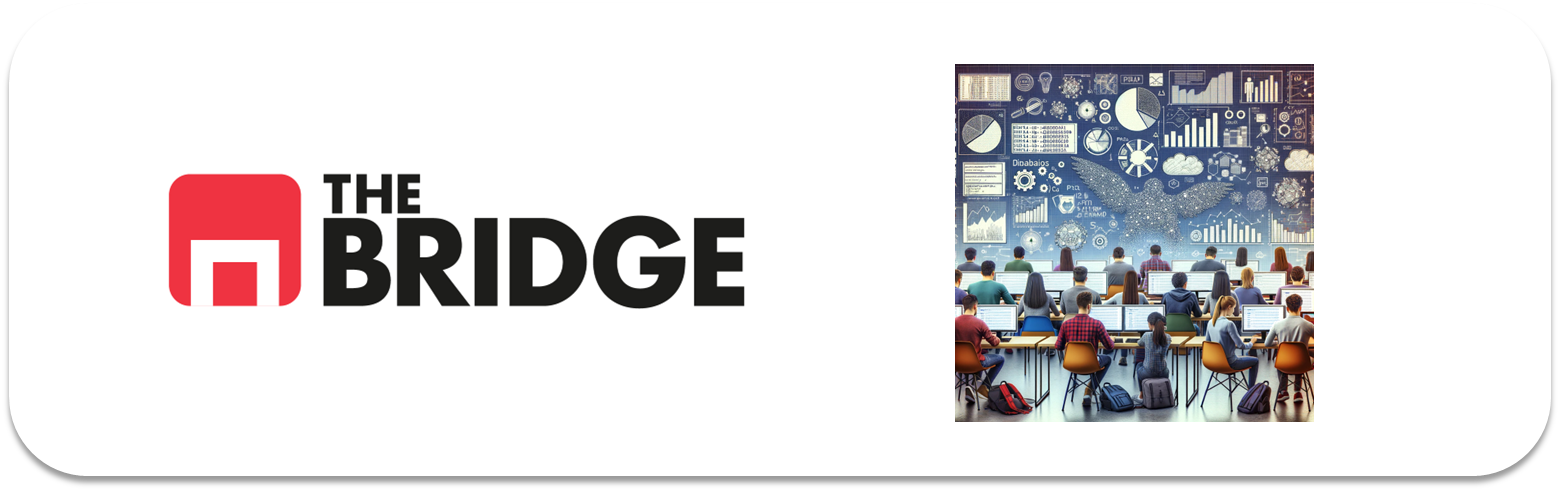

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [31]:
# Importo las librerías que voy a necesitar:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [32]:
# Ruta del archivo
ruta_dataset = ".\data\hard_to_find\obligatoria_hard.csv"

# Cargar el dataset en un DataFrame
try:
    boston_df = pd.read_csv(ruta_dataset)
    print("Dataset cargado correctamente")
    print(boston_df.info())  # Ver info general del DataFrame
except FileNotFoundError:
    print("¡Error! No se encuentra el archivo en la ruta especificada.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

Dataset cargado correctamente
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV  506 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB
None


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sheir\AppData\Local\Temp\ipykernel_23400\1343705959.py:2: SyntaxWarning: invalid escape sequence '\d'
  ruta_dataset = ".\data\hard_to_find\obligatoria_hard.csv"


In [33]:
#1. Cargar el conjunto de datos
boston_df = pd.read_csv(ruta_dataset, sep="|")
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


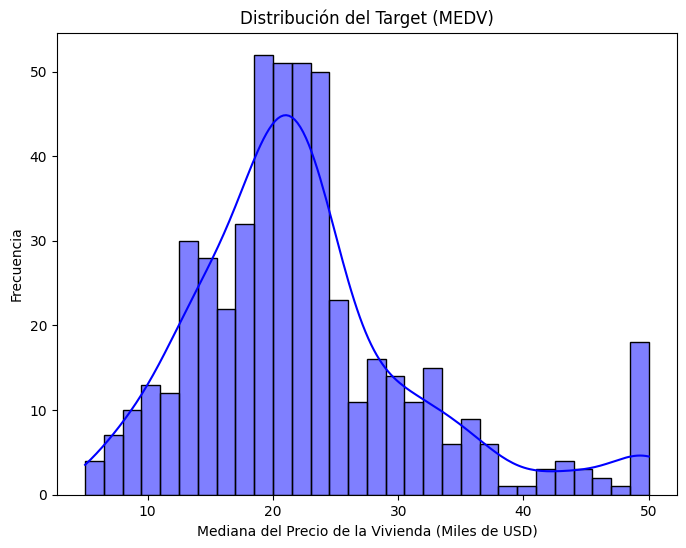

In [34]:
# 2. Análisis del target

# Identificar la variable target
target_col = "MEDV"  # Según la descripción, representa el precio medio de la vivienda

# Histograma y KDE para analizar la distribución
plt.figure(figsize=(8, 6))
sns.histplot(boston_df[target_col], bins=30, kde=True, color="blue")
plt.xlabel("Mediana del Precio de la Vivienda (Miles de USD)")
plt.ylabel("Frecuencia")
plt.title("Distribución del Target (MEDV)")
plt.show()

Esto me da más bien una curva asimétrica hacia la izquierda (sesgo negativo), lo que indica que hay más viviendas en el rango alto de precios y menos en el bajo.  
Se observa un pico en el extemo derecho, hay viviendas con precios excepcionalmente altos. Deberíamos considerar la transformación con logaritmo. La regresión es opción viable dado que MEDV sigue una ditribución continua y está centrada en valores razonables.

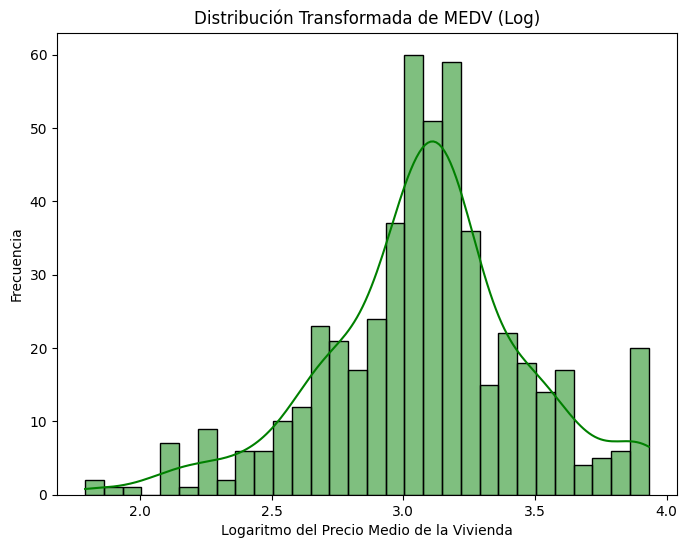

In [35]:
# Transformación de los datos con logaritmo:

# Aplicar transformación logarítmica
boston_df["MEDV_log"] = np.log1p(boston_df["MEDV"])  # Usamos log1p para evitar problemas con valores cercanos a 0

# Visualizar la nueva distribución
plt.figure(figsize=(8, 6))
sns.histplot(boston_df["MEDV_log"], bins=30, kde=True, color="green")
plt.xlabel("Logaritmo del Precio Medio de la Vivienda")
plt.ylabel("Frecuencia")
plt.title("Distribución Transformada de MEDV (Log)")
plt.show()

log1(x) evita problemas si existen valores muy pequeños o cercanos a cero.

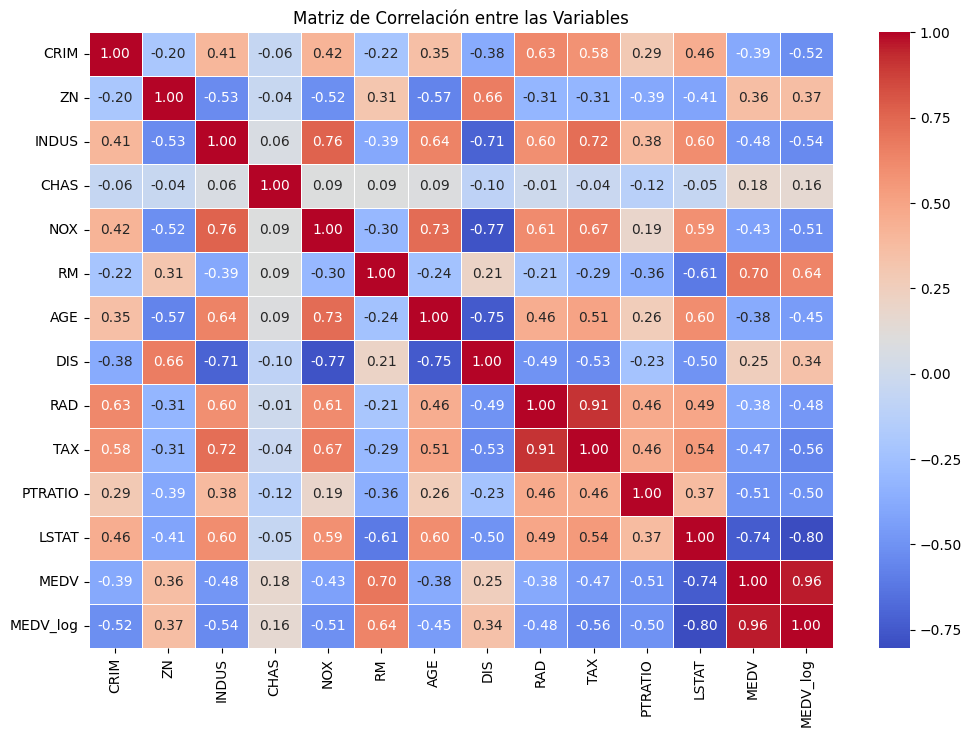

In [36]:
# Mapa de calor de correlaciones

# Calcular matriz de correlación
correlation_matrix = boston_df.corr()

# Mapa de calor con enfoque en la correlación con MEDV
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre las Variables")
plt.show()

MEDV correlaciona muy bien con RM en positivo. Negativamente correlaciona con CRIM, INDUS, NOX, TAX, PTRATIO y LSTAT

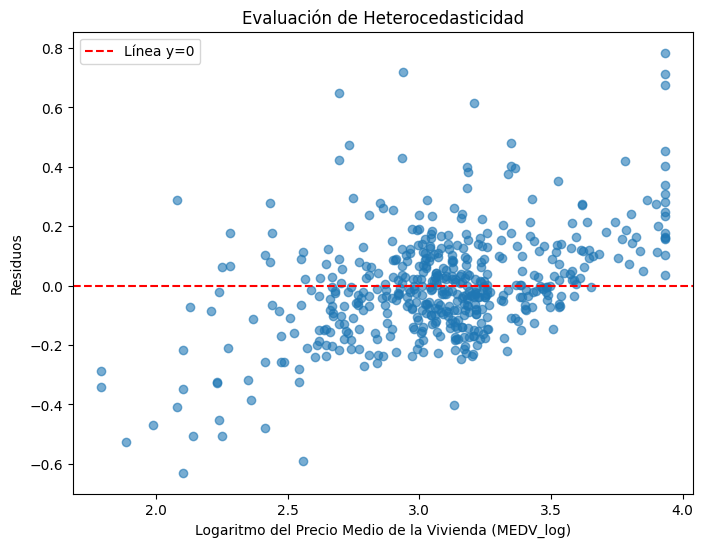

In [37]:
#Evaluación de la heterocedasticidad

# Crear un modelo preliminar de regresión
modelo_temp = LinearRegression()
modelo_temp.fit(boston_df.drop(columns=["MEDV", "MEDV_log"]), boston_df["MEDV_log"])
y_pred_temp = modelo_temp.predict(boston_df.drop(columns=["MEDV", "MEDV_log"]))
residuos = boston_df["MEDV_log"] - y_pred_temp

# Gráfico de dispersión de residuos vs MEDV_log
plt.figure(figsize=(8, 6))
plt.scatter(boston_df["MEDV_log"], residuos, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", label="Línea y=0")  # Línea base en y=0
plt.xlabel("Logaritmo del Precio Medio de la Vivienda (MEDV_log)")
plt.ylabel("Residuos")
plt.title("Evaluación de Heterocedasticidad")
plt.legend()
plt.show()

Parece que los residuos se van hacia la parte superior de la línea roja a medida que MEDV_log crece, con lo cual tengo heterocedasticidad, lo que significa que el erro del modelo no es constante a lo largo de los valores de MEDV_log.  

In [38]:
#3. Split en train y test y 4. construcción de parejas X,y

# Definir X (variables predictoras) y y (target)
X = boston_df[["RM", "CRIM", "INDUS", "NOX", "TAX", "PTRATIO", "LSTAT"]]  # Features seleccionadas
y = boston_df["MEDV_log"]  # Target transformado con logaritmo

# División en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")

Tamaño de X_train: (404, 7)
Tamaño de X_test: (102, 7)


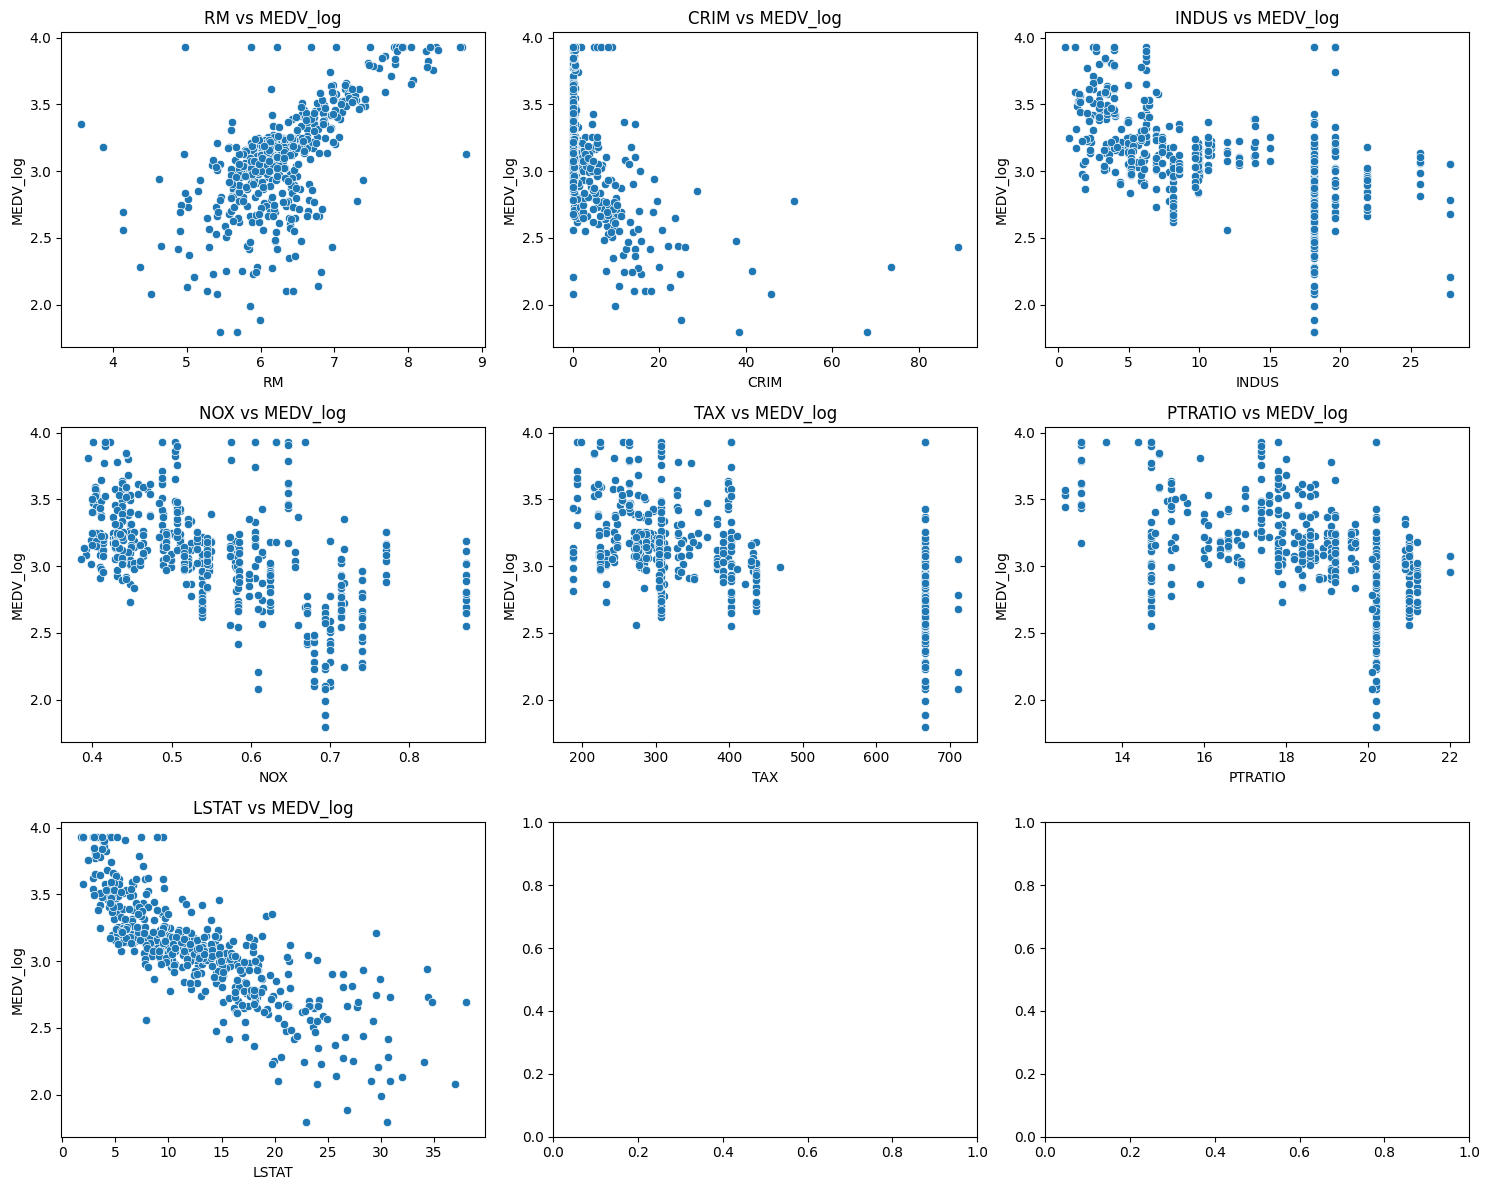

In [39]:
#5. Mini EDA y selección de features

# Gráficos de dispersión para cada feature respecto a MEDV_log
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, col in enumerate(X.columns):
    ax = axes[i//3, i%3]
    sns.scatterplot(x=X[col], y=y, ax=ax)
    ax.set_title(f"{col} vs MEDV_log")

plt.tight_layout()
plt.show()

Lo único que correlaciona de forma lineal es RM y LSTAT. El resto no lo vamos a trabajar

In [40]:
# 6. Tratamiento de variables con StandardScaler porque tienen rangos distintos y me puede dar problemas

# Escalar las variables seleccionadas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
# 7. Construcción del modelo

# Instanciar y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

LinearRegression()

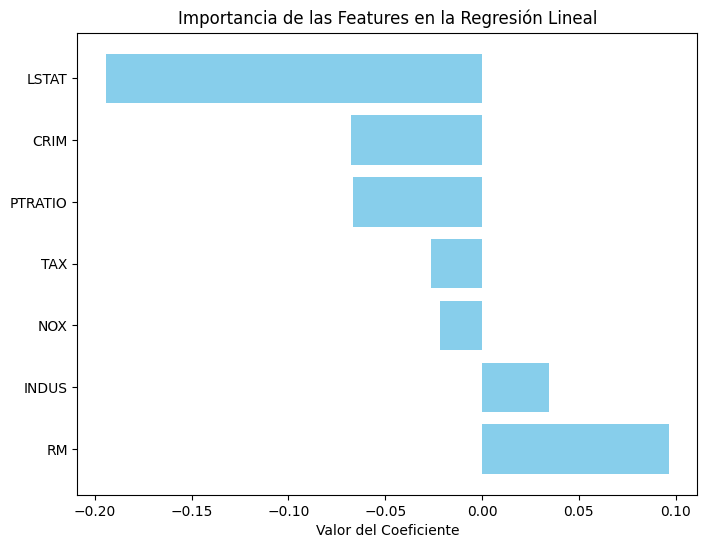

Intercepto: 3.10


In [42]:
# 8. Análisis de la importancia de las Features

# Crear un DataFrame con los coeficientes
coef_df = pd.DataFrame(modelo.coef_, X_train.columns, columns=["Coeficiente"])
coef_df.sort_values(by="Coeficiente", ascending=False, inplace=True)

# Graficar coeficientes
plt.figure(figsize=(8, 6))
plt.barh(coef_df.index, coef_df["Coeficiente"], color="skyblue")
plt.xlabel("Valor del Coeficiente")
plt.title("Importancia de las Features en la Regresión Lineal")
plt.show()

# Mostrar el intercepto del modelo
print(f"Intercepto: {modelo.intercept_:.2f}")

El RM es la variable más influyente en el precio de las casas. Un aumento de RM está asociado con un aumento en MEDV_log en +3.5.  
De forma negativa el LSTAT es la variable más influyente con un -3.5.  
La siguiente variable sería PTRATIO con un efecto de -2 y CRIM con -1. El resto de variables tienen poco impacto.  

Baseline - Regresión Lineal:
MAE: 0.13
MSE: 0.04
RMSE: 0.20
R²: 0.71


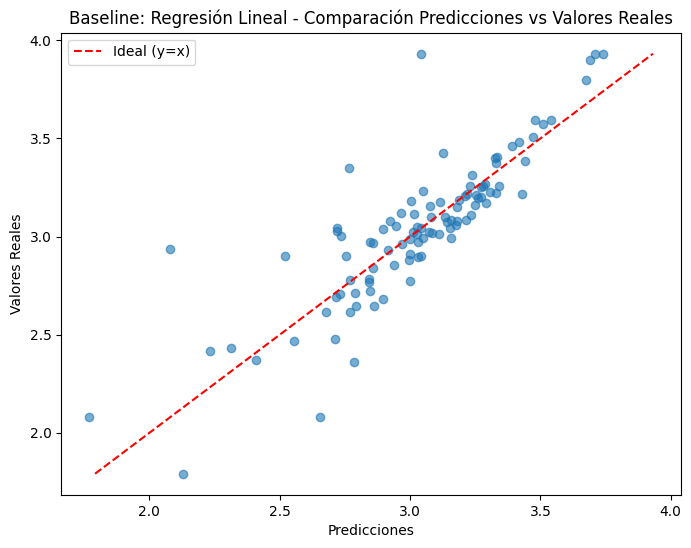

In [43]:
# Baseline con regresión lineal

# Entrenar el modelo de regresión lineal estándar
modelo_base = LinearRegression()
modelo_base.fit(X_train_scaled, y_train)

# Obtener predicciones
y_pred_base = modelo_base.predict(X_test_scaled)

# Evaluación del modelo base
mae_base = mean_absolute_error(y_test, y_pred_base)
mse_base = mean_squared_error(y_test, y_pred_base)
rmse_base = mse_base ** 0.5
r2_base = r2_score(y_test, y_pred_base)

print(f"Baseline - Regresión Lineal:")
print(f"MAE: {mae_base:.2f}")
print(f"MSE: {mse_base:.2f}")
print(f"RMSE: {rmse_base:.2f}")
print(f"R²: {r2_base:.2f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_base, y_test, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Ideal (y=x)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Baseline: Regresión Lineal - Comparación Predicciones vs Valores Reales")
plt.legend()
plt.show()

Cuando los puntos están cercanos a la línea roja, el modelo está haciendo predicciones cercanas a valores reales. El modelo parece cometer errores en rangos alejados de la centralidad de los datos. Puede indicar que el modelo no generaliza bien en casas muy caras o muy baratas.  
En principio, considero que el modelo puede generalizar bastante bien aunque se le puede aplicar regularización con Ridge.

In [44]:
#9. regularización.

# Lista de valores de alpha para probar
alphas = [0.1, 1, 10]

# Evaluación de Ridge con distintos valores de alpha
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    
    # Calcular métricas
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    rmse_ridge = mse_ridge ** 0.5
    r2_ridge = r2_score(y_test, y_pred_ridge)
    
    print(f"Ridge Regression con alpha={alpha}:")
    print(f"MAE: {mae_ridge:.2f}")
    print(f"MSE: {mse_ridge:.2f}")
    print(f"RMSE: {rmse_ridge:.2f}")
    print(f"R²: {r2_ridge:.2f}\n")

Ridge Regression con alpha=0.1:
MAE: 0.13
MSE: 0.04
RMSE: 0.20
R²: 0.71

Ridge Regression con alpha=1:
MAE: 0.13
MSE: 0.04
RMSE: 0.20
R²: 0.71

Ridge Regression con alpha=10:
MAE: 0.13
MSE: 0.04
RMSE: 0.20
R²: 0.71



El MAE se mantiene bastante constante alrededor de 3.40 - 3.42 con diferentes alpha lo que indica que si hay errores de predicción en el modelo serán similares en todos los casos.  
El Ridge no cambia llamativamente la precisión de las predicciones individuales.  

A medida que aumento alpha reduzco MSE, no muchísimo, pero sí se reduce. Esto puede decir que la regularización ha ayudado a estabilizar el modelo y a evitar coeficientes demasiado grandes.  

R^2 mejora con el aumento de alpha, otra vez no lo hace de forma muy llamativa pero sí lo hace, esto indica que la regularización algo ha ayudado a mejorar el modelo aunque no de forma drástica.  

En conclusión, la regularización no ha cambiado el modelo de forma drástica y se puede decir que antes de ella ya era bastante estable. Lo que sí ha pasado es que al regularizar los coeficientes no clrecen demasiado pero no mejora la precisión. Un alpha mayor ayuda a estabilizar pero se ha visto que tampoco es de altísima diferencia. Para más impacto se puede probar un Lasso

In [45]:
# Pruebo Lasso:

# Lista de valores de alpha para probar
alphas = [0.1, 1, 10]

# Evaluación de Lasso con distintos valores de alpha
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    
    # Calcular métricas
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    rmse_lasso = mse_lasso ** 0.5
    r2_lasso = r2_score(y_test, y_pred_lasso)
    
    print(f"Lasso Regression con alpha={alpha}:")
    print(f"MAE: {mae_lasso:.2f}")
    print(f"MSE: {mse_lasso:.2f}")
    print(f"RMSE: {rmse_lasso:.2f}")
    print(f"R²: {r2_lasso:.2f}\n")
    
    # Mostrar coeficientes del modelo
    coef_df = pd.DataFrame(lasso_model.coef_, X_train.columns, columns=["Coeficiente"])
    print(f"Coeficientes con alpha={alpha}:\n", coef_df)

Lasso Regression con alpha=0.1:
MAE: 0.16
MSE: 0.05
RMSE: 0.23
R²: 0.63

Coeficientes con alpha=0.1:
          Coeficiente
RM          0.034951
CRIM       -0.011117
INDUS      -0.000000
NOX        -0.000000
TAX        -0.000000
PTRATIO    -0.012228
LSTAT      -0.181443
Lasso Regression con alpha=1:
MAE: 0.27
MSE: 0.14
RMSE: 0.38
R²: -0.02

Coeficientes con alpha=1:
          Coeficiente
RM               0.0
CRIM            -0.0
INDUS           -0.0
NOX             -0.0
TAX             -0.0
PTRATIO         -0.0
LSTAT           -0.0
Lasso Regression con alpha=10:
MAE: 0.27
MSE: 0.14
RMSE: 0.38
R²: -0.02

Coeficientes con alpha=10:
          Coeficiente
RM               0.0
CRIM            -0.0
INDUS           -0.0
NOX             -0.0
TAX             -0.0
PTRATIO         -0.0
LSTAT           -0.0


A medida que alpha aumenta el error MAE también aumenta con lo que a mayor penalización mayor imprecisión.  
El MSE se dispara entre aplpha 0.1 y alpha 10 con lo que el modelo ya no lo está haciendo bien.  
Respecto de R^2, cae a casi 0 lo que dice que el modelo ha perdido su capacidad de predecir porque es que con R^2 = 0 ya ni es lineal.  

Cuando aloha es 0.1 todas las variables están activas pero cuando es 10 todas son 0.  

Comparativa: Ridge no eliminó variables pero redujo coeficientes, sin embargo Lasso seleccionó sólo las más relevantes lo que podía ayudar a generalizar pero nos tenemos que quedar como mucho en un alpha = 1.  

Si necesito un modelo estable y que conserve las features prefiero Ridge.  
Si quiero un modelo simple con sólo las features críticas Lasso es mejor pero con alpha = 1.

In [46]:
# Nos queda por probar Elastic Net

# Lista de valores de alpha para probar
alphas = [0.1, 1, 10]

# Evaluación de ElasticNet con distintos valores de alpha
for alpha in alphas:
    elastic_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio=0.5 mezcla Ridge y Lasso en proporciones iguales
    elastic_model.fit(X_train_scaled, y_train)
    y_pred_elastic = elastic_model.predict(X_test_scaled)
    
    # Calcular métricas
    mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
    mse_elastic = mean_squared_error(y_test, y_pred_elastic)
    rmse_elastic = mse_elastic ** 0.5
    r2_elastic = r2_score(y_test, y_pred_elastic)
    
    print(f"ElasticNet con alpha={alpha}:")
    print(f"MAE: {mae_elastic:.2f}")
    print(f"MSE: {mse_elastic:.2f}")
    print(f"RMSE: {rmse_elastic:.2f}")
    print(f"R²: {r2_elastic:.2f}\n")
    
    # Mostrar coeficientes del modelo
    coef_df = pd.DataFrame(elastic_model.coef_, X_train.columns, columns=["Coeficiente"])
    print(f"Coeficientes con alpha={alpha}:\n", coef_df)

ElasticNet con alpha=0.1:
MAE: 0.14
MSE: 0.04
RMSE: 0.20
R²: 0.70

Coeficientes con alpha=0.1:
          Coeficiente
RM          0.067629
CRIM       -0.040685
INDUS      -0.000000
NOX        -0.000000
TAX        -0.012916
PTRATIO    -0.037355
LSTAT      -0.174549
ElasticNet con alpha=1:
MAE: 0.27
MSE: 0.14
RMSE: 0.38
R²: -0.02

Coeficientes con alpha=1:
          Coeficiente
RM               0.0
CRIM            -0.0
INDUS           -0.0
NOX             -0.0
TAX             -0.0
PTRATIO         -0.0
LSTAT           -0.0
ElasticNet con alpha=10:
MAE: 0.27
MSE: 0.14
RMSE: 0.38
R²: -0.02

Coeficientes con alpha=10:
          Coeficiente
RM               0.0
CRIM            -0.0
INDUS           -0.0
NOX             -0.0
TAX             -0.0
PTRATIO         -0.0
LSTAT           -0.0


Se puede decir que ElasticNet con alpha = 0.1 se comporta como Ridge y con alpha = 1 es más Lasso. A alpha = 10 el modelo no vale.